# Representing data in memory

A typical program outline calls for us to load data from disk and place into memory organized into data structures. The way we represent data in memory is critical to building programs. This is particularly true with data science programs because processing data is our focus.  

First, let's get something straight about data. Data elements have *values* and *types*, such as `32` and *integer* or `"hi"` and *string*. We build the data structures by combining and organizing these data elements, such as a list of integers. 

We also have a special element called a *pointer* or *reference* that refers to another element. It's like a phone number "points at" a phone but is not the phone itself. Using the pointer we can get to the phone. A list of pointers is like a phone book with references to humans but the phone book is not actually a list of humans. (We will see later that even when we do something simple like `x=3`, the variable `x` is secretly a pointer to an integer object with the value of 3.)

Next, let's take a small detour into computer architecture to get a handle on what it means to load something into memory.

## Computer architecture detour

A computer consists of three primary components: a disk to hold data, a memory (that is wiped upon power off), and a processor (CPU) to process that data. Here is a picture of an actual CPU and some memory chips:

<img src="images/cpu-memory.png" width="400">

Computer memory (RAM == random access memory) is much faster but usually much smaller than the disk and all memory is lost when the computer powers off. Think of memory as your working or scratch space and the disk as your permanent storage. Memory chips are kind of like human short-term memory that is prone to disappearing versus a piece of paper which is slower to read and write but *persistent*.

The memory is broken up into discrete cells of a fixed size. The size of a cell is one *byte*, which consists of 8 *bits*, binary on/off digits. It is sufficient to hold a number between 0 and 255. Each cell is identified by an integer address, just like the numbers on mailboxes (see image below and to the right). Processors can ask for the data at a particular address and can store a piece of data at a specific memory location as well. For example, here is an abstract representation of byte-addressable computer memory:

<table border="0">
<tr>
<td><img src="images/addresses.png" width="80">
<td><img src="images/mailboxes.png"  width="70">
</table>

In this case, the memory has value 100 at address 0. At address 1, the memory has value 0. Address 4 has the maximum value we can store in a single byte: 255. 

**Everything from actual numbers to music to videos is stored using one or more of these atomic storage units called bytes.**

**Everything is stored as a number or sequence of numbers in a computer, even text.**

Data lives either in memory, on the disk, or can be retrieved from a network.  As part of producing a programming plan, you need to know where the data resides so you can incorporate loading that data into memory as part of the plan.

### Computer archicture metrics

Here are the key units we use in computer architecture:

* Kilo. $10^3 = 1,000$ or often $2^{10} = 1024$
* Mega. $10^6 = 1,000,000$
* Giga. $10^9 = 1,000,000,000$
* Tera. $10^12 = 1,000,000,000,000$

You need to know these units because you need to know whether a data set fits in memory or whether it fits on the disk or even how long it will take to transfer across the network. 

For example, when I started out, my first microcomputer had 16k of RAM, but my desktop now has 32G of RAM.  What is the ratio of memory size increase?  

CPUs execute instructions to the heartbeat of a clock, which is where we get the term clock rate. Mhz (million herz==cycles/second), Ghz (billion) are the typically units in clock ticks per second. My desktop has a 4Ghz clock rate, which means that you can execute approximately 4 giga- or billion instructions per second. That's a lot.

If your network is, say, 100Mbits/second that you can transfer a 800Mbit (100M byte) file in 8 seconds.

How big is the San Francisco phonebook (uncompressed)? How fast can you transfer that phonebook across a 8Mbit/second network?


## Programming language view of memory

Programming languages present us with a higher level view of the memory in two ways: we can use names to refer to locations in memory and each memory cell can hold integer and real number values of arbitrary size (they do have a limit, but let's keep things simple for now). For example, here are two named values stored in memory:

<img src="images/named-memory.png" width="90">

In [2]:
units = 923
price = 8.02

<img src="images/redbang.png" width="30" align="left">When referring to the kind of thing a value represents, we use the word **type**. The type of the "units" cell is integer and the type of "price" is real number (or floating-point number).

In [3]:
type(units)

int

In [4]:
type(price)

float

Another very common value type is *string*, which is really a list of characters. We use strings to hold place names, book titles, and any other text-based values.  We can think of strings as being a single value because the programming language hides the details.  Strings can be arbitrarily long and the programming language stores the characters as a sequence of bytes in memory. Each character takes one or two bytes. In other words, we think of it as

<img src="images/strings.png" width="110">

In [5]:
name = "Mary"

In [6]:
type(name)

str

but it is really more like this:

<img src="images/strings2.png" width="110">

Using package [lolviz](https://github.com/parrt/lolviz) we can visualize even simple types like strings:

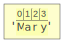

In [7]:
from lolviz import *
strviz(name)

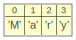

In [8]:
objviz(name) # render as list of char

These basic data types

* integer numbers
* floating-point numbers
* strings

are our building blocks. If we arrange some of these blocks together, we can create more complex structures.

## Data structures

### List

The most common *data structures* is the **list**, which is just a sequence of memory cells.  Because we're all familiar with spreadsheets, let's visualize these data structures using a spreadsheet.  Columns in a spreadsheet are really lists, such as the following lists/columns of integers, floating-point numbers, and strings:

<table border="0">
<tr>
<td><img src="images/int-list.png" width="60">
<td><img src="images/float-list.png" width="80">
<td><img src="images/names-list.png" width="139">
</tr>
</table>

In [9]:
Quantity = [6, 49, 27, 30, 19, 21, 12, 22, 21]

In [10]:
type(Quantity)

list

In [11]:
len(Quantity)

9

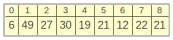

In [12]:
objviz(Quantity)

We can think of the rows of a spreadsheet as lists also. For example, the header row of a spreadsheet is really a list of strings:

<img src="images/header-row.png" width="750">

In [13]:
headers = ['Date', 'Quantity', 'Unit Price', 'Shipping']
type(headers)

list

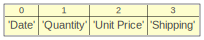

In [14]:
objviz(headers)

All of these lists have one thing in common: the type of element is the same. They are *homogeneous*. But, we can also have lists with *heterogeneous* elements, which is typically what we see in spreadsheet rows:

<img src="images/sample-row.png" width="800">

In [15]:
arow = ['10/13/10', 6, 38.94, 35, 'Muhammed MacIntyre']

or

In [16]:
from datetime import date
arow = [date(2010, 10, 13), 6, 38.94, 35, 'Muhammed MacIntyre']
arow

[datetime.date(2010, 10, 13), 6, 38.94, 35, 'Muhammed MacIntyre']

In [17]:
type(arow)

list

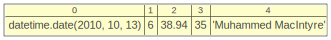

In [18]:
listviz(arow)

Heterogeneous lists are typically used to group bits of information about a particular entity. In machine learning, we call this a **feature vector**, an **instance**, or an **observation**.  For example, an apples versus oranges classifier might have feature vectors containing weight (number), volume (number), and color (string).  The important point here is that a list can also be used to as a way to aggregate features about a particular entity. The sequence of the elements is less important than the fact that they are contained (aggregated) within the same list.

### Tuple

A tuple is an immutable list and is often used for returning multiple values from a function. It's also a simple way to group number of related elements such as:

In [19]:
me = ('parrt',607)
me

('parrt', 607)

We index the elements just like we do with a list:

In [20]:
print(me[0])
print(me[1])

parrt
607


But, there's no way to change the elements, as there is with a list. If we do:

```python
me[0] = 'tombu'
```

the result is an error:

```
TypeError: 'tuple' object does not support item assignment
```

Here's an example of pulling apart a tuple using the multiple assignment statement:

In [52]:
me = ('parrt',607)
userid,office = me
print(userid)
print(office)
print(me[0], me[1])

parrt
607
parrt 607


In [54]:
me[2]   # causes error

IndexError: tuple index out of range

Tuples are a great way to group related items without having to create a formal Python class definition.

### Set

If we enforce a rule that all elements within a list are unique, then we get a **set**. Sets are unordered.

In [22]:
ids = {100, 103, 121, 102, 113, 113, 113, 113}
ids

{100, 102, 103, 113, 121}

In [23]:
type(ids)

set

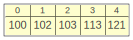

In [24]:
objviz(ids)

We can do lots of fun set arithmetic:

In [25]:
{100,102}.union({109})

{100, 102, 109}

In [26]:
{100,102}.intersection({100,119})

{100}

### Tables (list of lists)

Spreadsheets arrange rows one after the other, which programmers interpret as a *list of lists.* In the analytics or database world, we call this a **table**:

<img src="images/rows.png" width="700">

In this example, each row represents a sales transaction.

The input to machine learning algorithms is often a table where each row aggregates the data associated with a specific instance or observation. These tables are called **dataframes** and will become your BFF.

In [27]:
from pandas import DataFrame

df = DataFrame(data=[[99,'parrt'],[101,'sri'],[42,'kayla']],
               columns=['ID','user'])
df

,ID,user
0,99,parrt
1,101,sri
2,42,kayla


In [28]:
df.values

array([[99, 'parrt'],
       [101, 'sri'],
       [42, 'kayla']], dtype=object)

In [29]:
df.columns

Index(['ID', 'user'], dtype='object')

In [30]:
df.user

0    parrt
1      sri
2    kayla
Name: user, dtype: object

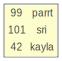

In [31]:
objviz(df.values)

### Matrix

If the table elements are all numbers, we call it a **matrix**. Here's a matrix with 5 rows and 2 columns:

<img src="images/matrix.png" width="110">

Let me introduce you to another of your new BFF, `numpy`:

In [32]:
import numpy as np
A = np.array([[19,11],
              [21,15],
              [103,18],
              [99,13],
              [8,2]])
print(A)

[[ 19  11]
 [ 21  15]
 [103  18]
 [ 99  13]
 [  8   2]]


That is a matrix with shape 5 rows, 2 columns:

In [33]:
A.shape

(5, 2)

There are many ways to represent or layout things and memory. In this case, we can view the matrix as a list of lists using lolviz:

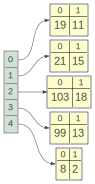

In [34]:
lolviz(A.tolist())

Or as a matrix

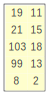

In [35]:
objviz(A)

We can do lots of matrix math with numpy:

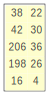

In [36]:
objviz(A+A)

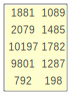

In [37]:
objviz(A*99)

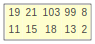

In [38]:
objviz(A.T) #transpose

Here's a system of equation: $A x = b$, $x = A^{-1} b$:

\begin{equation*}
\begin{bmatrix}
38 & 22\\
42 & 30
\end{bmatrix}
\begin{bmatrix}
x_1  \\
x_2 
\end{bmatrix} =
\begin{bmatrix}
3 \\
5 
\end{bmatrix}
\end{equation*}

Using numpy, we can solve that using the inverse of $A$.

In [39]:
from numpy.linalg import inv
A = np.array([[38, 22], [42, 30]])
b = np.array([3, 5])
x = inv(A).dot(b)
objviz(x)

Here's some more stuff about the shape of various numpy $n$-dimensional arrays:

In [40]:
x = np.array([3, 5])     # vertical vector with 2 rows
y = np.array([[3, 5]])   # matrix with 1 row and 2 columns
z = np.array([[3],[5]])  # matrix with 2 rows, 1 column
print(x.shape)
print(y.shape)
print(z.shape)

(2,)
(1, 2)
(2, 1)


The tuple `(2,)` means a one-dimensional vector with 2 rows.  We can't use notation `(2)` because that's just an expression that means 2 rather than a tuple. It's a quirk but necessary.

### Traversing lists

The spreadsheet model is a good one for understanding data structures but it's important to keep in mind that computers process one element (number or string) at a time.
As humans, we can look at the spreadsheet or data structure from above in its entirety, but programs must **walk** or **traverse** the elements of a data structure one after the other. It's kind of like sliding a magnifying glass over the elements of a list:

<img src="images/int-list-item.png" width="230">

This notion of traversal abstracts to any **sequence** (or **stream**) of elements, not just lists. For example, we will eventually traverse the lines of a text file or a sequence of filenames obtained from the operating system. Sequences are extremely powerful because it allows us to process data that is much bigger than the memory of our computer. We can process the data piecemeal whereas a list requires all elements to be in memory at once.

Typically we iterate through the elements of a list with a `for`-each statement:

In [41]:
for q in Quantity:
    print(q)

6
49
27
30
19
21
12
22
21


Here, the type of the objects pointed to by `q` is `int`.  We can also iterate through that list using an indexed loop:

In [42]:
for i in range(len(Quantity)):
    print(Quantity[i])

6
49
27
30
19
21
12
22
21


For lists and other structures that fit completely in memory, we often find a **reverse traversal** useful, that examines elements from last to first:

In [43]:
for q in reversed(Quantity):
    print(q)

21
22
12
21
19
30
27
49
6


### Dictionary

If we arrange two lists side-by-side and kind of glue them together, we get a **dictionary**. Dictionaries map one value to another, just like a dictionary in the real world maps a word to a definition.  Here is a sample dictionary that maps a movie title to the year it was nominated for an Oscar award:

<img src="images/dict.png" width="220">

In [44]:
{'a':1,'b':3,'hi':45}

{'a': 1, 'b': 3, 'hi': 45}

{'Amadeus': 1984, 'Witness': 1985}


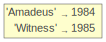

In [45]:
movies = {'Amadeus':1984, 'Witness':1985}
print(movies)
objviz(movies)

In [46]:
print(movies.keys())
print(movies.values())

dict_keys(['Amadeus', 'Witness'])
dict_values([1984, 1985])


Walking a dictionary is also easy but we have to decide whether we want to walk the keys or the values:

In [47]:
movies = {'Amadeus':1984, 'Witness':1985}
for m in movies: # walk keys
    print(m)

Amadeus
Witness


In [48]:
for m in movies.values(): # walk values
    print(m)

1984
1985


In [49]:
for (key,value) in movies.items():
    print(f"{key} -> {value}")

Amadeus -> 1984
Witness -> 1985


In [50]:
movies['Amadeus']

1984

```
movies['foo']
```

gets a KeyError:

```
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-40-72c06b90f573> in <module>()
----> 1 movies['foo'] # gets a KeyError

KeyError: 'foo'
```

## Summary

Here are the commonly-used data types:

* integer numbers like -2, 0, 99
* real numbers (floating-point numbers) like -2.3, 99.1932
* strings like "Mary", "President Obama"

And here are the commonly-used data structures:

* ordered list
* set (just an unordered, unique list)
* list of lists such as tables or matrices with rows and columns 
* tuples are immutable lists
* dictionary such as mapping a student name to their student ID; we can think of this as a table where each row in the table associates the key with a value.

Remember that all variable names are actually indirect references to a memory location. Everything is a pointer to the data in the implementation. That means we can have two variable names that refer to the same memory location and hence the variables are aliased. Changing one variable's elements appears to change the other variables elements.

Now that we know what data looks like in memory, let's consider a [computation model](computation.ipynb).